In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")

In [93]:
#Names of sheets in excel data file
sheets = ['ACCESS','STORES','RESTAURANTS','ASSISTANCE','INSECURITY','TAXES','LOCAL','HEALTH','SOCIOECONOMIC']

#Number of sheets as a range
num_sheets=range(len(sheets))

#Store each sheet as a dataframe in a dictionary
#The key is the name of the sheet in lower case. The value is the contents of the sheet stored as a dataframe
fea_dict={}
keys = [sheets[i].lower() for i in num_sheets]
for i in num_sheets:
    fea_dict[keys[i]]=pd.read_excel('FoodEnvironmentAtlas.xlsx',sheet_name=sheets[i],converters={'FIPS': str}) 

#conveert FIPS to string so that leading zero remains


In [94]:
#Join dataframes into one using an inner join. Join on the columns: FIPS, State, County
fea = fea_dict[keys[0]]
i=1 #initialize counter
while i<len(num_sheets):
    fea = pd.merge(fea, fea_dict[keys[i]], on=['FIPS','State','County'], how='inner')
    i+=1

In [95]:
#Make a copy of the single joined dataframe
fea_data=fea.copy()

In [96]:
# Select columns that are percentages because they are already normalized with respecct to county population. 
# This will also prevent redundant informaiton. Colunms that were from date after target variable year were
# not included, with the exception of poverty rates as there was no similar variable
columns=['FIPS',
'PCT_LACCESS_POP10',
'PCT_LACCESS_LOWI10',
'PCT_LACCESS_HHNV10',
'PCT_LACCESS_SNAP15',
'PCT_LACCESS_CHILD10',
'PCT_LACCESS_SENIORS10',
'GROCPTH11',
'SUPERCPTH11',
'CONVSPTH11',
'SPECSPTH11',
'SNAPSPTH12',
'WICSPTH11',
'FFRPTH11',
'FSRPTH11',
'PC_FFRSALES07',
'PC_FFRSALES12',
'PC_FSRSALES07',
'PC_FSRSALES12',
'REDEMP_SNAPS12',
'PCT_SNAP12',
'PC_SNAPBEN12',
'SNAP_PART_RATE11',
'PCT_NSLP12',
'PCT_FREE_LUNCH10',
'PCT_REDUCED_LUNCH10',
'PCT_SBP12',
'PCT_SFSP12',
'PC_WIC_REDEMP11',
'REDEMP_WICS11',
'PCT_WIC12',
'PCT_CACFP12',
'FOODINSEC_12_14',
'VLFOODSEC_12_14',
'PCT_LOCLFARM07',
'PCT_LOCLFARM12',
'PCT_LOCLSALE07',
'PCT_LOCLSALE12',
'PC_DIRSALES07',
'PC_DIRSALES12',
'PCH_PC_DIRSALES_07_12',
'FMRKTPTH13',
'VEG_ACRESPTH07',
'VEG_ACRESPTH12',
'PCH_VEG_ACRESPTH_07_12',
'FRESHVEG_ACRESPTH07',
'FRESHVEG_ACRESPTH12',
'PCH_FRESHVEG_ACRESPTH_07_12',
'ORCHARD_ACRESPTH07',
'ORCHARD_ACRESPTH12',
'PCH_ORCHARD_ACRESPTH_07_12',
'BERRY_ACRESPTH07',
'BERRY_ACRESPTH12',
'PCH_BERRY_ACRESPTH_07_12',
'GHVEG_SQFTPTH07',
'GHVEG_SQFTPTH12',
'PCH_GHVEG_SQFTPTH_07_12',
'RECFACPTH11',
'PCT_NHWHITE10',
'PCT_NHBLACK10',
'PCT_HISP10',
'PCT_NHASIAN10',
'PCT_NHNA10',
'PCT_NHPI10',
'PCT_65OLDER10',
'PCT_18YOUNGER10',
'MEDHHINC15',
'POVRATE15',
'PCT_DIABETES_ADULTS13',
'CHILDPOVRATE15']

In [97]:
#subset dataframe
fea_data_sub=fea_data[columns] 

In [98]:
fea_data_sub.shape

(3143, 70)

In [99]:
# Choose numerical columns
fea_data_sub_numeric=fea_data_sub.select_dtypes([np.number])

In [100]:
 # Create correlation matrix
corrmatrix=fea_data_sub_numeric.corr()

In [101]:
corrmatrix

,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_HHNV10,PCT_LACCESS_SNAP15,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,GROCPTH11,SUPERCPTH11,CONVSPTH11,SPECSPTH11,...,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,PCT_DIABETES_ADULTS13,CHILDPOVRATE15
PCT_LACCESS_POP10,1.000000,0.901991,0.120353,0.469834,0.960294,0.919663,0.336424,-0.114098,0.141654,-0.045043,...,0.080380,-0.029079,0.157304,-0.010990,0.170400,0.024031,0.083173,-0.111678,-0.184580,-0.115664
PCT_LACCESS_LOWI10,0.901991,1.000000,0.278653,0.625093,0.890419,0.826792,0.312603,-0.099019,0.205566,-0.100324,...,0.125123,-0.104286,0.263290,-0.018282,0.170309,0.071601,-0.175580,0.149489,-0.032667,0.142085
PCT_LACCESS_HHNV10,0.120353,0.278653,1.000000,0.469096,0.162711,0.043476,0.112428,-0.072707,0.083795,-0.123568,...,-0.118316,-0.119366,0.459477,-0.026078,-0.054357,0.083322,-0.348824,0.430246,0.268348,0.431192
PCT_LACCESS_SNAP15,0.469834,0.625093,0.469096,1.000000,0.514461,0.350932,0.127557,-0.005639,0.100199,-0.107596,...,0.136538,-0.085277,0.468196,-0.010444,-0.035277,0.183683,-0.287963,0.373430,0.136373,0.368432
PCT_LACCESS_CHILD10,0.960294,0.890419,0.162711,0.514461,1.000000,0.823572,0.291381,-0.093925,0.107640,-0.056868,...,0.120058,-0.018676,0.243110,-0.008160,0.046794,0.215924,0.110346,-0.099466,-0.196180,-0.111107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PCT_18YOUNGER10,0.024031,0.071601,0.083322,0.183683,0.215924,-0.142778,-0.110478,0.050706,-0.089650,-0.092104,...,0.308860,-0.012262,0.291096,-0.104604,-0.528833,1.000000,0.145593,-0.008683,-0.057354,-0.009211
MEDHHINC15,0.083173,-0.175580,-0.348824,-0.287963,0.110346,-0.008592,-0.050280,-0.049254,-0.294468,0.190558,...,0.036969,0.431306,-0.083894,0.102030,-0.291583,0.145593,1.000000,-0.783640,-0.575257,-0.814689
POVRATE15,-0.111678,0.149489,0.430246,0.373430,-0.099466,-0.122713,-0.054436,0.025516,0.189015,-0.196037,...,0.087124,-0.156139,0.201709,-0.045336,-0.074526,-0.008683,-0.783640,1.000000,0.530610,0.938094
PCT_DIABETES_ADULTS13,-0.184580,-0.032667,0.268348,0.136373,-0.196180,-0.094231,-0.083842,0.025011,0.227950,-0.210047,...,-0.294174,-0.290610,0.016914,-0.043644,0.224886,-0.057354,-0.575257,0.530610,1.000000,0.607158


In [137]:
corrmatrix['PCT_DIABETES_ADULTS13']['PC_SNAPBEN12'] , corrmatrix['PCT_DIABETES_ADULTS13']['PCT_SNAP12']

(0.5441524917427926, 0.5352225777609942)

In [102]:
# Iterate through corrmatrix to get column pairs with correlation above threshold of 0.9
# Display these pairs


iters = range(len(corrmatrix.columns) - 1)
drop_cols = []

for i in iters:
        for j in range(i+1):
            item = corrmatrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= 0.85:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

PCT_LACCESS_LOWI10 | PCT_LACCESS_POP10 | 0.9
PCT_LACCESS_CHILD10 | PCT_LACCESS_POP10 | 0.96
PCT_LACCESS_CHILD10 | PCT_LACCESS_LOWI10 | 0.89
PCT_LACCESS_SENIORS10 | PCT_LACCESS_POP10 | 0.92
PC_FSRSALES12 | PC_FSRSALES07 | 0.91
VLFOODSEC_12_14 | FOODINSEC_12_14 | 0.86
VEG_ACRESPTH12 | VEG_ACRESPTH07 | 1.0
FRESHVEG_ACRESPTH12 | FRESHVEG_ACRESPTH07 | 0.95
ORCHARD_ACRESPTH12 | ORCHARD_ACRESPTH07 | 0.97
BERRY_ACRESPTH12 | BERRY_ACRESPTH07 | 0.98
CHILDPOVRATE15 | POVRATE15 | 0.94


In [103]:
# List column to drop from each pair
drops=['PCT_LACCESS_LOWI10','PCT_LACCESS_CHILD10','PCT_LACCESS_SENIORS10','PC_FSRSALES07','VEG_ACRESPTH07','FRESHVEG_ACRESPTH07','ORCHARD_ACRESPTH07','BERRY_ACRESPTH07','CHILDPOVRATE15','VLFOODSEC_12_14']

In [104]:
# Drop columns from dataframe
fea_data_sub_numeric=fea_data_sub_numeric.drop(columns=drops)

In [105]:
# Display dataframe with only selected columns 
fea_data_sub_numeric

,PCT_LACCESS_POP10,PCT_LACCESS_HHNV10,PCT_LACCESS_SNAP15,GROCPTH11,SUPERCPTH11,CONVSPTH11,SPECSPTH11,SNAPSPTH12,WICSPTH11,FFRPTH11,...,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,PCT_65OLDER10,PCT_18YOUNGER10,MEDHHINC15,POVRATE15,PCT_DIABETES_ADULTS13
0,33.769657,3.284786,4.608749,0.090581,0.018116,0.561604,0.018116,0.674004,0.090567,0.615953,...,17.582599,2.400542,0.855766,0.397647,0.040314,11.995382,26.777959,56580.0,12.7,13.0
1,19.318473,2.147827,1.298900,0.144746,0.032166,0.573622,0.107219,0.725055,0.139380,0.648675,...,9.308425,4.384824,0.735193,0.628755,0.043343,16.771185,22.987408,52387.0,12.9,10.4
2,20.840972,4.135869,4.303147,0.219370,0.000000,0.804358,0.109685,1.280590,0.255942,0.694673,...,46.691190,5.051535,0.389700,0.218524,0.087409,14.236807,21.906982,31433.0,32.0,18.4
3,4.559753,3.458580,0.676710,0.263794,0.043966,0.835348,0.000000,0.719122,0.263771,0.263794,...,21.924504,1.771765,0.096007,0.279293,0.030548,12.681650,22.696923,40767.0,22.2,14.8
4,2.700840,3.269380,0.812727,0.121608,0.017373,0.521177,0.017373,0.657144,0.139000,0.347451,...,1.263040,8.070200,0.200621,0.497191,0.031402,14.722096,24.608353,50487.0,14.7,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,30.570505,0.877134,2.141828,0.113603,0.022721,0.636176,0.022721,0.428936,0.090948,0.568014,...,0.947359,15.269598,0.739625,0.723645,0.093594,8.316212,27.094462,71867.0,8.5,8.1
3139,29.174527,1.374848,0.670815,0.232818,0.000000,0.605327,0.279382,0.242215,0.140095,1.257217,...,0.150277,14.985442,1.070724,0.356908,0.061050,9.852541,19.141542,83290.0,6.6,4.8
3140,20.220414,0.966219,2.072485,0.143548,0.047849,0.574190,0.095698,0.554895,0.143589,0.909134,...,0.227294,8.783976,0.279383,0.582442,0.161000,8.873946,30.168577,62968.0,9.8,9.0
3141,10.915407,0.396304,1.053980,0.236407,0.000000,0.472813,0.000000,0.669502,0.236742,0.827423,...,0.257823,13.617719,0.539084,0.597680,0.011719,17.672565,25.454119,56088.0,11.2,12.0


In [106]:
fea_data_sub_numeric['log_MEDHHINC15'] = np.log10(fea_data_sub_numeric.MEDHHINC15.values)

In [107]:
FEA_df = fea_data_sub_numeric.drop(columns='MEDHHINC15')

In [108]:
FEA_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3143 entries, 0 to 3142
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PCT_LACCESS_POP10            3143 non-null   float64
 1   PCT_LACCESS_HHNV10           3143 non-null   float64
 2   PCT_LACCESS_SNAP15           3123 non-null   float64
 3   GROCPTH11                    3143 non-null   float64
 4   SUPERCPTH11                  3143 non-null   float64
 5   CONVSPTH11                   3143 non-null   float64
 6   SPECSPTH11                   3143 non-null   float64
 7   SNAPSPTH12                   3143 non-null   float64
 8   WICSPTH11                    3008 non-null   float64
 9   FFRPTH11                     3143 non-null   float64
 10  FSRPTH11                     3143 non-null   float64
 11  PC_FFRSALES07                3143 non-null   float64
 12  PC_FFRSALES12                3143 non-null   float64
 13  PC_FSRSALES12     

In [109]:
#FEA_df.isnull()

### Cleaning the data by dropping off rows with Null values (NA/NAN/NAT).

In [110]:
FEA_df_clean = FEA_df.dropna()
FEA_df_clean.shape

(138, 59)

### Ooooops!!!! There is a big problem, we lost almost all the observations (rows) of the dataset

### Check for the total number of null entries in each column

In [111]:
for i in range(len(FEA_df.columns)):
    null_count = FEA_df[FEA_df.columns[i]].isnull().sum()
    null_total = {FEA_df.columns[i]: null_count}
    print(null_total)

{'PCT_LACCESS_POP10': 0}
{'PCT_LACCESS_HHNV10': 0}
{'PCT_LACCESS_SNAP15': 20}
{'GROCPTH11': 0}
{'SUPERCPTH11': 0}
{'CONVSPTH11': 0}
{'SPECSPTH11': 0}
{'SNAPSPTH12': 0}
{'WICSPTH11': 135}
{'FFRPTH11': 0}
{'FSRPTH11': 0}
{'PC_FFRSALES07': 0}
{'PC_FFRSALES12': 0}
{'PC_FSRSALES12': 0}
{'REDEMP_SNAPS12': 242}
{'PCT_SNAP12': 0}
{'PC_SNAPBEN12': 56}
{'SNAP_PART_RATE11': 0}
{'PCT_NSLP12': 0}
{'PCT_FREE_LUNCH10': 21}
{'PCT_REDUCED_LUNCH10': 31}
{'PCT_SBP12': 0}
{'PCT_SFSP12': 0}
{'PC_WIC_REDEMP11': 1109}
{'REDEMP_WICS11': 132}
{'PCT_WIC12': 0}
{'PCT_CACFP12': 0}
{'FOODINSEC_12_14': 0}
{'PCT_LOCLFARM07': 69}
{'PCT_LOCLFARM12': 68}
{'PCT_LOCLSALE07': 346}
{'PCT_LOCLSALE12': 287}
{'PC_DIRSALES07': 288}
{'PC_DIRSALES12': 243}
{'PCH_PC_DIRSALES_07_12': 459}
{'FMRKTPTH13': 3}
{'VEG_ACRESPTH12': 612}
{'PCH_VEG_ACRESPTH_07_12': 898}
{'FRESHVEG_ACRESPTH12': 1227}
{'PCH_FRESHVEG_ACRESPTH_07_12': 2091}
{'ORCHARD_ACRESPTH12': 597}
{'PCH_ORCHARD_ACRESPTH_07_12': 1122}
{'BERRY_ACRESPTH12': 810}
{'PCH_BERRY_A

### There is need to further drop the columns with large number of null entries

In [112]:
further_drops = ['PC_WIC_REDEMP11',
                 'PCH_VEG_ACRESPTH_07_12',
                 'FRESHVEG_ACRESPTH12',
                 'PCH_FRESHVEG_ACRESPTH_07_12',
                 'PCH_ORCHARD_ACRESPTH_07_12',
                 'BERRY_ACRESPTH12',
                 'PCH_BERRY_ACRESPTH_07_12',
                 'GHVEG_SQFTPTH07',
                 'GHVEG_SQFTPTH12',
                 'PCH_GHVEG_SQFTPTH_07_12'       
]

In [113]:
FEA_df = FEA_df.drop(columns=further_drops)

In [114]:
FEA_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3143 entries, 0 to 3142
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCT_LACCESS_POP10      3143 non-null   float64
 1   PCT_LACCESS_HHNV10     3143 non-null   float64
 2   PCT_LACCESS_SNAP15     3123 non-null   float64
 3   GROCPTH11              3143 non-null   float64
 4   SUPERCPTH11            3143 non-null   float64
 5   CONVSPTH11             3143 non-null   float64
 6   SPECSPTH11             3143 non-null   float64
 7   SNAPSPTH12             3143 non-null   float64
 8   WICSPTH11              3008 non-null   float64
 9   FFRPTH11               3143 non-null   float64
 10  FSRPTH11               3143 non-null   float64
 11  PC_FFRSALES07          3143 non-null   float64
 12  PC_FFRSALES12          3143 non-null   float64
 13  PC_FSRSALES12          3143 non-null   float64
 14  REDEMP_SNAPS12         2901 non-null   float64
 15  PCT_

### Clean the new dataframe by dropping off rows with Null values (NA/NAN/NAT).

In [115]:
FEA_df_clean = FEA_df.dropna()
FEA_df_clean.shape

(1790, 49)

### We take weighted average between the "PCT_DIABETES_ADULTS08" and "PCT_DIABETES_ADULTS13"

In [116]:
#  alfa = 0.4
#  betta = 0.6
#  df_FEA_clean['PCT_AVG_DIABETES_ADULTS_08_13'] = alfa*df_FEA_clean.PCT_DIABETES_ADULTS08 + betta*df_FEA_clean.PCT_DIABETES_ADULTS13

### Split data into training and testing sets

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [118]:
FEA_df_clean_train, FEA_df_clean_test = train_test_split(FEA_df_clean.copy(), shuffle=True, random_state=215,
                                                         test_size =0.2)

In [119]:
# Splitting the training dataset for a cross validation set
# 'PCT_DIABETES_ADULTS08', 

FEA_df_clean_tt, FEA_df_clean_val = train_test_split(FEA_df_clean_train.copy(), shuffle=True, random_state=215,
                                                         test_size =0.2)

feature_s_ = FEA_df_clean_tt.columns[:-2]

feature_s = feature_s_.append(FEA_df_clean_tt.columns[-1:])

target_s = ['PCT_DIABETES_ADULTS13']

In [120]:
len(feature_s)

48

### More DEA using pairplot between selected features and the target variable.

In [121]:
'''
vars1 = FEA_df_clean_tt.columns[-2:]
vars2 = vars1[:-1] 
vars_list = feature_s.append(vars2)

# Calculate the number of rows and columns for subplots
num_vars = len(vars_list)
num_cols = 5  # Number of columns in each row
num_rows = (num_vars + num_cols - 1) // num_cols  # Round up division

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

# Plot pairplots
for i, var in enumerate(vars_list):
    row = i // num_cols
    col = i % num_cols
    sns.pairplot(FEA_df_clean_tt, vars=[var])
  
'''

'\nvars1 = FEA_df_clean_tt.columns[-2:]\nvars2 = vars1[:-1] \nvars_list = feature_s.append(vars2)\n\n# Calculate the number of rows and columns for subplots\nnum_vars = len(vars_list)\nnum_cols = 5  # Number of columns in each row\nnum_rows = (num_vars + num_cols - 1) // num_cols  # Round up division\n\n# Create subplots\nfig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))\n\n# Plot pairplots\nfor i, var in enumerate(vars_list):\n    row = i // num_cols\n    col = i % num_cols\n    sns.pairplot(FEA_df_clean_tt, vars=[var])\n  \n'

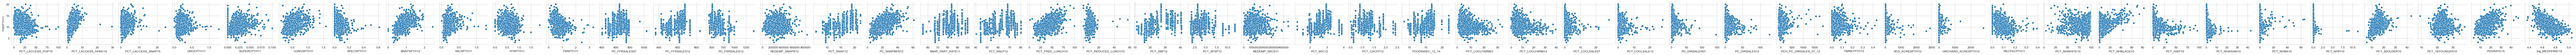

In [122]:
g = sns.pairplot(FEA_df_clean_tt, x_vars=feature_s, y_vars=target_s)
names = FEA_df_clean.columns.map(lambda t: t.split('(')[0])
for i in range(10):
    g.axes[0,i].xaxis.set_label_text(names[i])
    g.axes[0,i].yaxis.set_label_text(names[10])
    
plt.show()

### We build different regression models with their various default hyperparameters.

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [124]:
models = {'lrg': LinearRegression(),
          'KNR': KNeighborsRegressor(),
          'SVRreg': SVR(),
          'RFR': RandomForestRegressor(random_state=215),
          'ABR': AdaBoostRegressor(random_state=215),
          'GB': GradientBoostingRegressor(random_state=215),
          'XGBR': XGBRegressor(random_state=215)
}

In [125]:
models

{'lrg': LinearRegression(),
 'KNR': KNeighborsRegressor(),
 'SVRreg': SVR(),
 'RFR': RandomForestRegressor(random_state=215),
 'ABR': AdaBoostRegressor(random_state=215),
 'GB': GradientBoostingRegressor(random_state=215),
 'XGBR': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=215, ...)}

### We now fit these models and do cross validation

In [126]:
from sklearn.metrics import mean_squared_error

In [127]:
mses1 = {}

for name, model in models.items():
    model.fit(FEA_df_clean_tt[feature_s], FEA_df_clean_tt[target_s])
    pred = model.predict(FEA_df_clean_val[feature_s])
    errs = mean_squared_error(pred, FEA_df_clean_val[target_s])
    #mses.append(errs)
    mses1[name] = errs
    
    #mses[name] = mean_squared_error(df_val[target], model.predict(df_val[features]))
    

print('Mean Squared Errors:', '\n', mses1)

C:\Users\enyic\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enyic\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\enyic\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enyic\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

Mean Squared Errors: 
 {'lrg': 1.56141850869055, 'KNR': 7.333017421602787, 'SVRreg': 5.824418709017798, 'RFR': 1.4251704285714282, 'ABR': 1.8371090137804145, 'GB': 1.300049157165188, 'XGBR': 1.514118859294884}


### Checking the coefficients and intercepts from the Linear Regression model

In [128]:
[lrg_coef, lrg_intercepts] = [models['lrg'].coef_, models['lrg'].intercept_]

print('lrg coef:', lrg_coef, '\n\n', 'features:', feature_s, '\n\n', 'lrg intercepts:', lrg_intercepts, '\n')


lrg coef: [[-2.05682716e-02  1.04278532e-01  3.83283855e-02  3.98828762e-01
  -1.20125740e+00 -2.48398209e-01 -1.44266797e+00  9.39207982e-01
  -7.10022055e-01  1.30235568e-01 -9.37027385e-01 -3.84705860e-03
   7.97416310e-03 -1.45466145e-03  4.66152133e-07  1.97330935e-01
   2.69882326e-02 -2.37377277e-02  1.09974171e-02  7.54459610e-03
   2.02899973e-02 -1.64071494e-02 -6.52990040e-02  8.82098644e-07
  -4.69692824e-01 -4.27918551e-01 -8.18664204e-03  2.02588541e-02
  -1.44858367e-02  8.21182634e-02 -1.27730984e-03 -7.47479692e-03
  -7.87887141e-03 -3.48847586e-05 -7.88093265e-01 -1.95914448e-04
   9.62170530e-04 -2.82430168e+00 -3.39739002e-02  6.16194971e-03
  -6.88089519e-02 -2.57546825e-02 -2.84086182e-03 -3.08112654e-01
   2.28192857e-01  8.93769602e-02 -6.52224813e-02 -3.05672718e+00]] 

 features: Index(['PCT_LACCESS_POP10', 'PCT_LACCESS_HHNV10', 'PCT_LACCESS_SNAP15',
       'GROCPTH11', 'SUPERCPTH11', 'CONVSPTH11', 'SPECSPTH11', 'SNAPSPTH12',
       'WICSPTH11', 'FFRPTH11', 'F

In [129]:
import time

### We perform hyperparameter tuning for the Gradient Boosting Regressor model

C:\Users\enyic\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enyic\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enyic\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enyic\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\enyic\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enyic\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enyic\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enyic\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C:\Users\enyic\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enyic\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enyic\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enyic\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


C:\Users\enyic\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 1.489477655056367 


Top 30 Most Important Features:
                  Feature  Importance
15             PCT_SNAP12    0.221973
16           PC_SNAPBEN12    0.090515
47         log_MEDHHINC15    0.072933
44          PCT_65OLDER10    0.062851
40             PCT_HISP10    0.051358
1      PCT_LACCESS_HHNV10    0.043522
41          PCT_NHASIAN10    0.042962
7              SNAPSPTH12    0.042729
39          PCT_NHBLACK10    0.039759
13          PC_FSRSALES12    0.026803
12          PC_FFRSALES12    0.025007
21              PCT_SBP12    0.018978
19       PCT_FREE_LUNCH10    0.018707
5              CONVSPTH11    0.018561
22             PCT_SFSP12    0.017052
26        FOODINSEC_12_14    0.016659
37            RECFACPTH11    0.013425
10               FSRPTH11    0.012924
28         PCT_LOCLFARM12    0.011618
45        PCT_18YOUNGER10    0.011437
38          PCT_NHWHITE10    0.010761
11          PC_FFRSALES07    0.010149
25            PCT_CACFP12    0.009391
24             

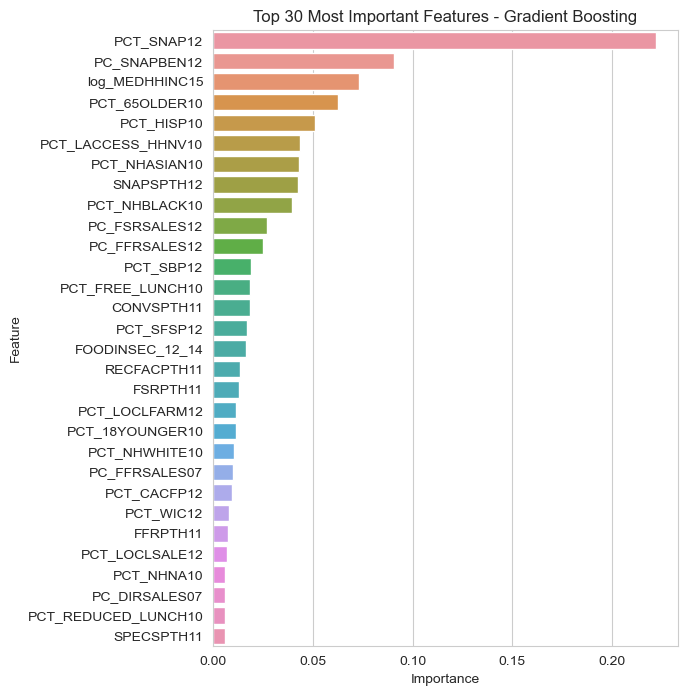

Elapsed time: 1025.0505576133728 seconds


In [130]:
# Record the start time
start_time = time.time()

from sklearn.model_selection import GridSearchCV

GBR_reg =  GradientBoostingRegressor()
              
GBR_reg


# subsample: percentage of rows used for each tree construction. Lowering this value can prevent 
# overfitting by training on a smaller subset of the data.

param_grid = {
    'n_estimators': [100, 150, 200],  # Number of trees in the forest
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'learning_rate': [0.1, 0.01]
    #'subsample': [0.2, 0.5, 0.7, 1]
}


grid_search = GridSearchCV(estimator=GBR_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(FEA_df_clean_train[feature_s], FEA_df_clean_train[target_s])

# Get the best parameters and the best estimator
best_params_GB = grid_search.best_params_        
best_estimator_GB = grid_search.best_estimator_

print("Best Parameters:", best_params_GB)

# Train the best estimator on the training set
best_estimator_GB.fit(FEA_df_clean_train[feature_s], FEA_df_clean_train[target_s])  

# Make predictions on the testing data using the best estimator
pred0 = best_estimator_GB.predict(FEA_df_clean_test[feature_s])  

# Calculate Mean Squared Error
mse = mean_squared_error(FEA_df_clean_test[target_s], pred0)   
print("Mean Squared Error:", mse, '\n\n')




    
    
# Get feature importances
feature_importances_GB = best_estimator_GB.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df_GB = pd.DataFrame({
    'Feature': feature_s,
    'Importance': feature_importances_GB
})

# Sort the DataFrame by importance in descending order
feature_importance_df_GB = feature_importance_df_GB.sort_values(by='Importance', ascending=False)

# Display the table result
print("Top 30 Most Important Features:")
print(feature_importance_df_GB.head(48))

# Plot feature importances
plt.figure(figsize=(6, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_GB.head(30))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 30 Most Important Features - Gradient Boosting')
plt.show()


# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time, "seconds")